<a href="https://colab.research.google.com/github/katterincampos/Programacion3/blob/main/IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load("fashion_mnist", as_supervised = True, with_info =  True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteL7DTHB/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteL7DTHB/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [ ]:
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

In [ ]:
nombres_objetos = ["Camiseta", "Pantalon", "Pull-over", "Saco", "Sandalia", "Camisa", "Zapatilla de deporte", "Bolsa", "Botin", "Vestidos"]

In [ ]:
nombres_clases = metadatos.features["label"].names

In [ ]:
nombres_objetos

['Camiseta',
 'Pantalon',
 'Pull-over',
 'Saco',
 'Sandalia',
 'Camisa',
 'Zapatilla de deporte',
 'Bolsa',
 'Botin',
 'Vestidos']

In [ ]:
# Funcion normalizadora de los pixeles de 0 - 255 que sean de 0 - 1

In [ ]:
def normalizar(imagenes, nombres_objetos):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, nombres_objetos

In [ ]:
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [ ]:
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

In [ ]:
import matplotlib.pyplot as plt


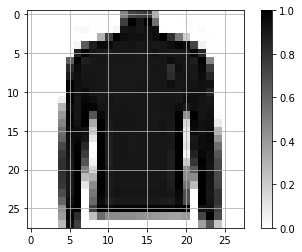

In [ ]:
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

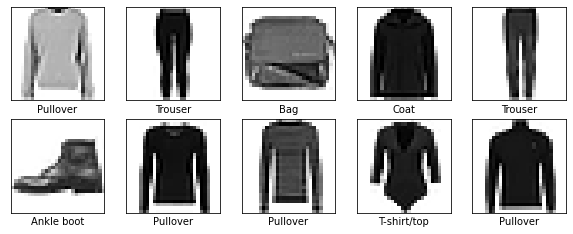

In [ ]:
plt.figure(figsize = (10,10))
for i, (imagen, etiqueta) in enumerate (datos_entrenamiento.take(10)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid()
  plt.imshow (imagen, cmap = plt.cm.binary)
  plt.xlabel (nombres_clases [etiqueta])
plt.show()

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    
])

In [ ]:
# Compilar el modelo

In [ ]:
modelo.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
   
)

In [ ]:
num_entrenamiento = metadatos.splits ["train"]. num_examples
num_pruebas = metadatos.splits ["test"]. num_examples

print("num_datos_entrenamiento", num_entrenamiento, "num_datos_pruebas", num_pruebas)

num_datos_entrenamiento 60000 num_datos_pruebas 10000


In [ ]:
Tamaño_lote = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_entrenamiento). batch(Tamaño_lote)
datos_pruebas = datos_pruebas.batch(Tamaño_lote)

In [ ]:
historial = modelo.fit(datos_entrenamiento, epochs = 5, steps_per_epoch = math.ceil(num_entrenamiento/Tamaño_lote))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5036 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3846 - accuracy: 0.8604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3203 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3055 - accuracy: 0.8871


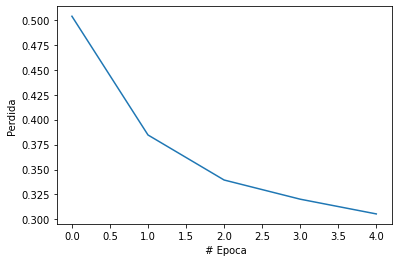

In [ ]:
plt.xlabel (" # Epoca")
plt.ylabel ("Perdida")
plt.plot(historial.history ["loss"])